In [1]:
# 분석에 필요한 데이터 4개 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

seoul_202112 = pd.read_csv('C:/Users/82109/Documents/sda_2023/seoul_202112.csv')
seoul_busan_201903 = pd.read_csv('C:/Users/82109/Documents/sda_2023/seoul, busan_201903.csv')
seoul_covid19 = pd.read_excel('C:/Users/82109/Documents/sda_2023/서울시구별코로나_확진자_사망자.xlsx')
obesity_20192021 = pd.read_csv('C:/Users/82109/Documents/sda_2023/obesity_rate_2019_2021.csv', encoding='euc-kr')

#seoul_202112
#seoul_busan_201903
#obesity_20192021
#seoul_covid19

In [5]:
# seoul_202112 전처리
select_col = ['상호명', '상권업종대분류코드', '상권업종중분류명', '시군구명', '상가업소번호']
seoul_202112 = seoul_202112[select_col]
seoul_202112['년도'] = 2021
seoul_202112 = seoul_202112[seoul_202112['상권업종대분류코드'] == 'Q']
seoul_202112

,상호명,상권업종대분류코드,상권업종중분류명,시군구명,상가업소번호,년도
4,비지트,Q,한식,서초구,17174175,2021
5,쓰리에프,Q,한식,동작구,17174119,2021
6,채움,Q,한식,종로구,17174096,2021
7,다향,Q,한식,서초구,17174040,2021
8,고향생막걸리,Q,유흥주점,강남구,25530299,2021
...,...,...,...,...,...,...
315261,궁정만두,Q,분식,강남구,17914614,2021
315277,컴포즈커피,Q,커피점/카페,은평구,17913993,2021
315278,돼지코생곱창갈비잠실새내점,Q,한식,송파구,17919998,2021
315281,커스텀샐러드,Q,한식,관악구,17933219,2021


In [19]:
# obesity_20192021 전처리
obesity_20192021 = obesity_20192021.iloc[[0, 1, 2]]
obesity_20192021 = obesity_20192021.drop(columns=['19~29세', '30~44세', '45~64세', '65세 이상'])
obesity_20192021

,성별,년도,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,전체,2019,31.8,34.2,29.1,26.5,32.4,28.9,36.1,36.2,...,30.7,33.0,35.2,34.3,30.0,35.1,25.1,28.6,27.9,31.3
1,전체,2020,28.9,28.7,26.2,25.5,29.6,25.1,31.3,31.9,...,30.2,29.6,30.5,28.3,29.9,27.1,24.7,25.6,27.0,31.8
2,전체,2021,28.6,25.4,27.2,26.2,26.3,27.6,31.3,31.0,...,29.6,28.0,34.9,28.0,28.8,29.5,23.5,22.5,27.2,27.1


In [17]:
# seoul_busan_201903 전처리
seoul_busan_201903 = seoul_busan_201903[seoul_busan_201903['시도명'] == '서울특별시']
select_col = ['상호명', '상권업종대분류코드', '상권업종중분류명', '시군구명', '상가업소번호']
seoul_busan_201903 = seoul_busan_201903[select_col]
seoul_busan_201903['년도'] = 2019
seoul_busan_201903 = seoul_busan_201903[seoul_busan_201903['상권업종대분류코드'] == 'Q']
seoul_busan_201903

,상호명,상권업종대분류코드,상권업종중분류명,시군구명,상가업소번호,년도
0,커피빈코리아선릉로93길점,Q,커피점/카페,강남구,19911397,2019
1,프로포즈,Q,유흥주점,금천구,19911801,2019
3,와라와라호프,Q,유흥주점,강남구,19905471,2019
5,석봉토스트,Q,패스트푸드,광진구,19964615,2019
6,허술한집,Q,분식,강서구,19975850,2019
...,...,...,...,...,...,...
539735,최가면반,Q,한식,마포구,16289850,2019
539748,호중정원,Q,중식,종로구,16289082,2019
539751,꿀닭,Q,닭/오리요리,마포구,16283157,2019
539755,전설의짬뽕,Q,중식,서초구,16284293,2019


In [11]:
# seoul_covid19 전처리
seoul_covid19.columns = ['날짜', '총합계 확진', '총합계 사망', '강남구 확진', '강남구 사망', '강동구 확진', '강동구 사망',
    '강북구 확진', '강북구 사망', '강서구 확진', '강서구 사망', '관악구 확진', '관악구 사망', '광진구 확진',
       '광진구 사망', '구로구 확진', '구로구 사망', '금천구 확진', '금천구 사망', '노원구 확진',
       '노원구 사망', '도봉구 확진', '도봉구 사망', '동대문구 확진', '동대문구 사망', '동작구 확진',
       '동작구 사망', '마포구 확진', '마포구 사망', '서대문구 확진', '서대문구 확진', '서초구 확진',
       '서초구 사망', '성동구 확진', '성동구 사망', '성북구 확진', '성북구 사망', '송파구 확진',
       '송파구 사망', '양천구 확진', '양천구 사망', '영등포구 확진', '영등포구 사망', '용산구 확진',
       '용산구 사망', '은평구 확진', '은평구 사망', '종로구 확진', '종로구 사망', '중구 확진',
       '중구 사망', '중랑구 확진', '중랑구 사망', '기타 확진', '기타 사망', '타시도 확진',
       '타시도 사망']
seoul_covid19 = seoul_covid19.drop(0)
drop_col = ['기타 확진', '기타 사망', '타시도 확진', '타시도 사망']
seoul_covid19 = seoul_covid19.drop(columns=drop_col)
seoul_covid19 = seoul_covid19.iloc[:-1]
seoul_covid19

,날짜,총합계 확진,총합계 사망,강남구 확진,강남구 사망,강동구 확진,강동구 사망,강북구 확진,강북구 사망,강서구 확진,...,용산구 확진,용산구 사망,은평구 확진,은평구 사망,종로구 확진,종로구 사망,중구 확진,중구 사망,중랑구 확진,중랑구 사망
1,2020-01-24 00:00:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-30 00:00:00,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2020-01-31 00:00:00,3,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-02-02 00:00:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-05 00:00:00,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,2023-08-27 00:00:00,1905,1,121,0,116,0,32,0,118,...,32,0,165,0,10,0,29,0,41,0
1281,2023-08-28 00:00:00,8485,1,452,0,459,0,223,0,503,...,177,0,377,0,99,0,104,0,355,0
1282,2023-08-29 00:00:00,7470,5,399,0,382,0,220,1,411,...,145,0,347,0,98,0,79,0,286,0
1283,2023-08-30 00:00:00,6423,3,308,0,305,0,156,0,375,...,105,1,348,0,69,0,82,0,256,0


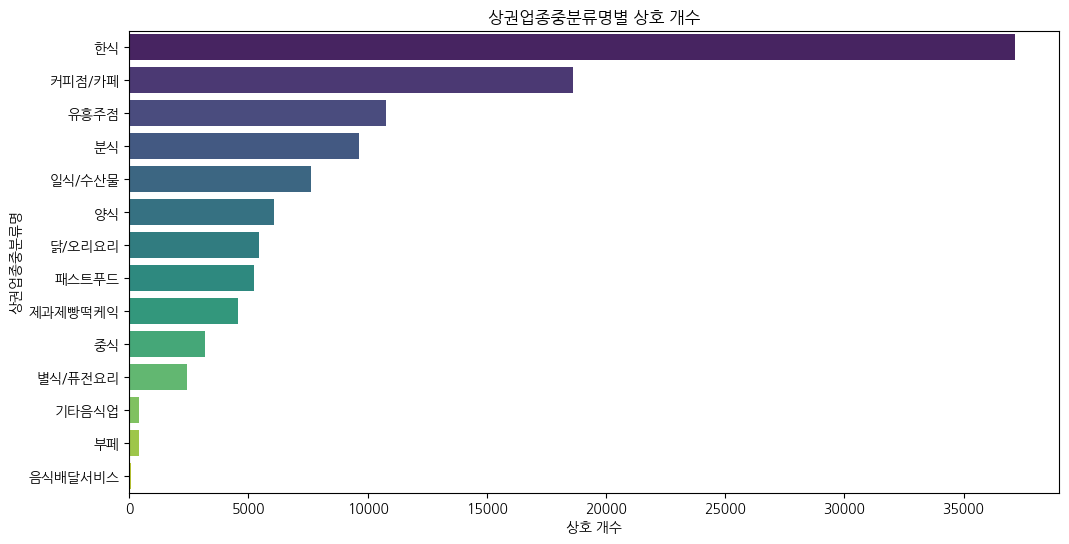

<Figure size 1200x800 with 0 Axes>

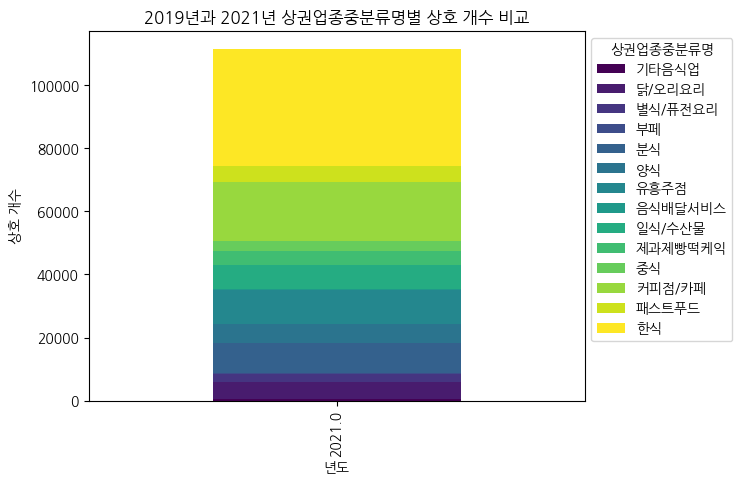